# Class 36.7 : Section 30: Naive Bayes


## Class 36.7 : Section 30: Naive Bayes
- See handnotes for detailed notes of :
    - Probability revision. P(A U B)
    - Contingency tables in probability
    - Types of probabilities - Joint, Marginal, Conditional 
    - Bayes Theorem derivation and its application in ML

### Class 36.7.2 : Crash Course on Porbability part 2 by CampusX

### Code for:
- Contingency table
- Joint probability distribution
- Marginal probability
- Conditional Probability

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Creating contingency table
# Basically this is table representing count of all combinations of A and B in data
pd.crosstab(df['Survived'], df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [8]:
# Creating Joint probability distribution from contingency table .... divides each cell with total # obs.
# Basically this is distribution of A n B .. for all combinations
pd.crosstab(df['Survived'], df['Pclass'],normalize='all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


In [11]:
# Creating Marginal probability distribution from contingency table .... divides each cell with total # obs.
# The entries in "All" rows are the marginal probabilities
# P(Survived = 0) = 0.616 ... and so on ... these are marginal probability .. probability of a single event irrespective of other events
# P(PClass = 1 ) = 0.242 .. and so on 
pd.crosstab(df['Survived'], df['Pclass'],normalize='all', margins=True)

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


In [12]:
# Conditional probability .. 
# P(Survived = 0 .. given Pclass = 1) = P (Survived = 0 AND given Pclass = 1) / P( PClass = 1) = 0.0898/0.2424 = 0.37
# This table has P(Survived = y .. given Pclass = x)
pd.crosstab(df['Survived'], df['Pclass'],normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [13]:
# Conditional probability .. 
# P( Pclass = 1 .. given Survived = 0) = P ( Pclass = 1 AND given Survived = 0) / P( Survived = 0) = 0.0898/0.6161 = 0.1457
# This table has P( Pclass = x .. given Survived = y)
pd.crosstab(df['Survived'], df['Pclass'],normalize='index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


## Class 36.7 : Section 30: Naive Bayes

### Class 36.7.3 : Session 1 on Naive Bayes


#### Code for calculating probabilities for "Play Tennis Dataset" for understanding how Naive Bayes calculates all the 22 probabilities during training phase. 

In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
# Conditional probability for each category of "Outlook" .. P(Overcast | No) P(Rain | No) and so on. 
pd.crosstab(df['Outlook'], df['Play Tennis'],normalize='columns')

Play Tennis,No,Yes
Outlook,,
Overcast,0.0,0.444444
Rain,0.4,0.333333
Sunny,0.6,0.222222


In [21]:
# Converting data to dictionary format
pd.crosstab(df['Outlook'], df['Play Tennis'],normalize='columns').stack().to_dict()

{('Overcast', 'No'): 0.0,
 ('Overcast', 'Yes'): 0.4444444444444444,
 ('Rain', 'No'): 0.4,
 ('Rain', 'Yes'): 0.3333333333333333,
 ('Sunny', 'No'): 0.6,
 ('Sunny', 'Yes'): 0.2222222222222222}

In [22]:
# Calculating probability for all the features
D = {}
for i in ['Outlook','Temperature',	'Humidity',	'Wind']:
  D.update(pd.crosstab(df[i], df['Play Tennis'],normalize='columns').stack().to_dict())
D

{('Overcast', 'No'): 0.0,
 ('Overcast', 'Yes'): 0.4444444444444444,
 ('Rain', 'No'): 0.4,
 ('Rain', 'Yes'): 0.3333333333333333,
 ('Sunny', 'No'): 0.6,
 ('Sunny', 'Yes'): 0.2222222222222222,
 ('Cool', 'No'): 0.2,
 ('Cool', 'Yes'): 0.3333333333333333,
 ('Hot', 'No'): 0.4,
 ('Hot', 'Yes'): 0.2222222222222222,
 ('Mild', 'No'): 0.4,
 ('Mild', 'Yes'): 0.4444444444444444,
 ('High', 'No'): 0.8,
 ('High', 'Yes'): 0.3333333333333333,
 ('Normal', 'No'): 0.2,
 ('Normal', 'Yes'): 0.6666666666666666,
 ('Strong', 'No'): 0.6,
 ('Strong', 'Yes'): 0.3333333333333333,
 ('Weak', 'No'): 0.4,
 ('Weak', 'Yes'): 0.6666666666666666}

## Class 36.7 : Section 30: Naive Bayes

### Class 36.7.3 : Session 1 on Naive Bayes by CampusX


## Code for sentiment classification on text data using Naive Bayes. 
- Refer to hand notes for explaination of now Naive Bayes is used... and to understand about bag of words

In [ ]:
import numpy as np
import pandas as pd

In [24]:
pwd

'C:\\Users\\suvam\\Desktop\\IT Return related docs\\Suvam Learning and Training notes\\003_Machine Learning Algos_Aug24'

In [25]:
df=pd.read_csv('DataFiles\\Class36_7_3_NaiveBayes_SentimentAnalysis_IMDB_Dataset.csv')

In [26]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [27]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Text Cleaning

1. Sample 10000 rows
2. Remove html tags
3. Remove special characters
4. Converting every thing to lower case
5. Removing Stop words
6. Stemming

In [28]:
df=df.sample(10000)
print(df.shape)
df.info()

(10000, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 39481 to 29798
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [29]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

C:\Users\suvam\AppData\Local\Temp\ipykernel_11328\3295325465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
C:\Users\suvam\AppData\Local\Temp\ipykernel_11328\3295325465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sent

,review,sentiment
39481,this show just sucks. i don't think i even nee...,0
42250,"The movie was actually not THAT bad, especiall...",0
21733,I'd have to agree with the previous reviewer: ...,0
25858,"""Congo"" is based on the best-selling novel by ...",0
5082,When this was first aired on Masterpiece Theat...,1


In [30]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].review)

"I'd have to agree with the previous reviewer: This film has awesome animation, but has problems throughout the rest of the movie.Plot holes are huge, dialog barely explains the concepts of the plot--the MAIN PLOT POINTS aren't even fully explained until the last five minutes of the film. The characters state the obvious, while failing to explain the more confusing points of the film. There are characters that pop up and have importance in the storyline that are never explained--most of them have names that are only mentioned *once*, and it is exceedingly confusing to a viewer.Don't waste your time with this movie. Unless you are in it for a good laugh and how DUMB it is."

In [31]:
# Function to clean html tags
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [32]:
df['review']=df['review'].apply(clean_html)

In [33]:
# converting everything to lower

def convert_lower(text):
    return text.lower()

In [34]:
df['review']=df['review'].apply(convert_lower)

In [35]:
# function to remove special characters

def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x + ' '
    return x

In [36]:
remove_special(' th%e @ classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare. forget pretty pictures painted for mainstream audiences, f')

' th e   classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  forget pretty pictures painted for mainstream audiences  f'

In [37]:
df['review']=df['review'].apply(remove_special)

In [38]:
# Remove the stop words
import nltk

In [39]:
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suvam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
df

,review,sentiment
39481,this show just sucks i don t think i even nee...,0
42250,the movie was actually not that bad especiall...,0
21733,i d have to agree with the previous reviewer ...,0
25858,congo is based on the best selling novel by ...,0
5082,when this was first aired on masterpiece theat...,1
...,...,...
14572,written by the excellent mcgovern and directed...,0
6303,first off i just watched a movie on showtime ...,0
18978,this is an intimate movie of a sincere girl in...,1
5115,normally when i go on a raid of the local holl...,0


In [46]:

def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [47]:
df['review']=df['review'].apply(remove_stopwords)

In [48]:
df

,review,sentiment
39481,"[show, sucks, think, even, need, say, judging,...",0
42250,"[movie, actually, bad, especially, plot, wise,...",0
21733,"[agree, previous, reviewer, film, awesome, ani...",0
25858,"[congo, based, best, selling, novel, michael, ...",0
5082,"[first, aired, masterpiece, theatre, profound,...",1
...,...,...
14572,"[written, excellent, mcgovern, directed, frear...",0
6303,"[first, watched, movie, showtime, called, surv...",0
18978,"[intimate, movie, sincere, girl, real, world, ...",1
5115,"[normally, go, raid, local, hollywood, video, ...",0


In [49]:
# Perform stemming

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [50]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
        

In [51]:
stem_words(['I','loved','loving','it'])

['i', 'love', 'love', 'it']

In [52]:
df['review']=df['review'].apply(stem_words)

In [53]:
df

,review,sentiment
39481,"[show, suck, think, even, need, say, judg, num...",0
42250,"[movi, actual, bad, especi, plot, wise, doughi...",0
21733,"[agre, previou, review, film, awesom, anim, pr...",0
25858,"[congo, base, best, sell, novel, michael, cric...",0
5082,"[first, air, masterpiec, theatr, profound, eff...",1
...,...,...
14572,"[written, excel, mcgovern, direct, frear, film...",0
6303,"[first, watch, movi, showtim, call, surviv, is...",0
18978,"[intim, movi, sincer, girl, real, world, holly...",1
5115,"[normal, go, raid, local, hollywood, video, he...",0


In [54]:
# Join back

def join_back(list_input):
    return " ".join(list_input)
    

In [55]:
df['review']=df['review'].apply(join_back)

In [56]:
df['review']

39481    show suck think even need say judg number comm...
42250    movi actual bad especi plot wise doughi hairi ...
21733    agre previou review film awesom anim problem t...
25858    congo base best sell novel michael crichton th...
5082     first air masterpiec theatr profound effect be...
                               ...                        
14572    written excel mcgovern direct frear film sligh...
6303     first watch movi showtim call surviv island sa...
18978    intim movi sincer girl real world hollywood ch...
5115     normal go raid local hollywood video head towa...
29798    thank g bomb might get treat delight skate fu ...
Name: review, Length: 10000, dtype: object

In [57]:
X=df.iloc[:,0:1].values

In [58]:
X.shape

(10000, 1)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)

In [60]:
X=cv.fit_transform(df['review']).toarray()

In [61]:
X.shape

(10000, 2500)

In [62]:
X[0].mean()

0.0288

In [63]:
y=df.iloc[:,-1].values

In [64]:
y.shape

(10000,)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
X_train.shape

(8000, 2500)

In [67]:
X_test.shape

(2000, 2500)

In [68]:
y_train.shape

(8000,)

In [69]:
y_test.shape

(2000,)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [71]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [72]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB()

In [73]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [74]:
y_test.shape

(2000,)

In [75]:
y_pred1.shape

(2000,)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.751
Multinomial 0.8405
Bernaulli 0.8505


### Code for displaying probability values of test points .. and log probability values as well ( to prevent underflow ... for numerical stability ) 
- functions .predict_proba(test_point) and .predict_log_proba(test_point) are used
- The code uses multinomial , but the same function is available in Bernoulli and Categorical NaiveBayes as well

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np

# Sample text dataset: emails labeled as spam (1) or not spam (0)
texts = [
    "Free money now", 
    "Hey, how are you?", 
    "Win $1000 cash prize", 
    "Meeting today at 3 PM", 
    "Exclusive deal for you",
    "Don't miss this limited offer",
    "Let's catch up later",
    "Get your free trial now", 
    "Dinner at my place?", 
    "You won a lottery!"
]

# Labels: 1 for spam, 0 for not spam
labels = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

# Step 1: Convert text to word counts using CountVectorizer (bag-of-words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 3: Apply Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 4: Predict probabilities and log probabilities for a test point
test_point = X_test[0]

# Predict class probabilities (P(C|X))
proba = model.predict_proba(test_point)
log_proba = model.predict_log_proba(test_point)

# Step 5: Output predicted probabilities and log probabilities
print(f"Predicted probabilities: {proba}")
print(f"Log probabilities: {log_proba}")

# Step 6: Predict the actual class for reference
predicted_class = model.predict(test_point)
print(f"Predicted class: {predicted_class}")

# Print the actual test sample (for reference)
print(f"Test sample (text): {vectorizer.inverse_transform(test_point)}")
print(f"Actual label: {y_test[0]}")


Predicted probabilities: [[0.66552013 0.33447987]]
Log probabilities: [[-0.4071864  -1.09517857]]
Predicted class: [0]
Test sample (text): [array(['at', 'dinner', 'my', 'place'], dtype='<U9')]
Actual label: 0


## Class 36.7 : Section 30: Naive Bayes

### 193 : Naive Bayes practical by Krish

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X,y=load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [81]:
y_pred=gnb.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Code for Out of core Naive Bayes - Suvam Self generated - using chatGPT
- The code is using multinomial Naive Bayes ... Gaussian and Beroulli use similar approach

In [82]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Simulated batch data (in a real-world scenario, batches would come from disk or a large dataset)
# We are simulating a large dataset split into smaller chunks (batches)

# Batch 1
X_batch1 = np.array([[2, 1, 0], [1, 0, 1], [2, 2, 1], [0, 1, 1]])
y_batch1 = np.array([0, 1, 0, 1])

# Batch 2
X_batch2 = np.array([[0, 1, 2], [1, 2, 1], [0, 0, 2], [1, 1, 1]])
y_batch2 = np.array([1, 0, 1, 0])

# Batch 3 (Test Data)
X_test = np.array([[1, 1, 1], [0, 1, 1], [2, 0, 1], [1, 0, 2]])
y_test = np.array([0, 1, 0, 1])

# Incrementally fit the model using batches
# MultinomialNB's partial_fit method requires the list of possible classes upfront
classes = np.array([0, 1])

# Fit the first batch
model.partial_fit(X_batch1, y_batch1, classes=classes)

# Fit the second batch
model.partial_fit(X_batch2, y_batch2)

# After incremental fitting, test the model on new data
y_pred = model.predict(X_test)

# Print the results
print(f"Predicted: {y_pred}")
print(f"Actual: {y_test}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Predicted: [0 1 0 1]
Actual: [0 1 0 1]
Accuracy: 1.0


## Code for Complement Naive Bayes - Suvam Self generated - using chatGPT

In [83]:
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulated dataset
# Features: [Number of marketing emails opened, Total emails sent]
# Target: Sales conversion (1 for converted, 0 for not converted)
X = np.array([
    [2, 10], [3, 10], [5, 10], [8, 10], [0, 10], [7, 10], [1, 10], [6, 10], [9, 10], [4, 10],
    [1, 15], [0, 15], [4, 15], [6, 15], [8, 15], [3, 15], [7, 15], [5, 15], [2, 15], [9, 15]
])
y = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Complement Naive Bayes model
model = ComplementNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Predicted labels: {y_pred}")
print(f"Actual labels: {y_test}")
print(f"Accuracy: {accuracy}")


Predicted labels: [0 1 0 1 1 1]
Actual labels: [0 1 0 0 1 1]
Accuracy: 0.8333333333333334


## Code for Binomial Naive Bayes - Suvam Self generated - using chatGPT
- Binomial Naive Bayes is not part of sk-learn ... this is a custom code for binomial naive bayes
- Laplace additive smootheing is not included in this... can be improved further if needed.

In [84]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.stats import binom

# Sample text dataset: emails labeled as spam (1) or not spam (0)
texts = [
    "Free money now", 
    "Hey, how are you?", 
    "Win $1000 cash prize", 
    "Meeting today at 3 PM", 
    "Exclusive deal for you",
    "Don't miss this limited offer",
    "Let's catch up later",
    "Get your free trial now", 
    "Dinner at my place?", 
    "You won a lottery!"
]

# Labels: 1 for spam, 0 for not spam
labels = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

# Step 1: Convert text to word counts using CountVectorizer (bag-of-words)
vectorizer = CountVectorizer(binary=True)  # Binary=True converts word occurrences to 1 or 0
X = vectorizer.fit_transform(texts).toarray()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

class BinomialNaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.word_likelihoods = {}
        self.classes = []

    def fit(self, X, y):
        # Get unique classes
        self.classes = np.unique(y)

        # Calculate class priors P(C)
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)

        # Calculate likelihood for each word P(X_i | C) using binomial distribution
        # Here, we assume each word in the document follows a binomial distribution
        for c in self.classes:
            X_c = X[y == c]
            # Calculate the probability of each word being present in class c
            word_probs = np.mean(X_c, axis=0)  # Frequency of 1s (word presence)
            self.word_likelihoods[c] = word_probs

    def predict(self, X):
        predictions = []
        for x in X:
            class_posteriors = []
            for c in self.classes:
                # Start with the prior probability
                prior_log = np.log(self.class_priors[c])

                # Binomial likelihood for each word in the document
                likelihood_log = 0
                for i in range(len(x)):
                    # Probability of word i given class c
                    p_word_given_c = self.word_likelihoods[c][i]
                    
                    # Calculate binomial likelihood for word i
                    # Binomial distribution: P(X_i = x_i | C = c)
                    # x_i is either 1 (word present) or 0 (word absent)
                    likelihood_log += np.log(binom.pmf(x[i], n=1, p=p_word_given_c))

                # Posterior = prior + likelihood
                posterior = prior_log + likelihood_log
                class_posteriors.append(posterior)

            # Predict the class with the highest posterior probability
            predictions.append(self.classes[np.argmax(class_posteriors)])

        return np.array(predictions)

# Step 3: Instantiate and train the model
model = BinomialNaiveBayes()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f"Predicted labels: {y_pred}")
print(f"Actual labels: {y_test}")
print(f"Accuracy: {accuracy}")


Predicted labels: [0 0 0]
Actual labels: [0 0 1]
Accuracy: 0.6666666666666666


C:\Users\suvam\AppData\Local\Temp\ipykernel_11328\2341785757.py:69: RuntimeWarning: divide by zero encountered in log
  likelihood_log += np.log(binom.pmf(x[i], n=1, p=p_word_given_c))


# Class 36.8 : Section 31: KNN


## Class 36.8 : Section 31: KNN

### Class 36.8.1 : What is K Nearest Neighbors? | KNN Explained in Hindi | Simple Overview in 1 Video | CampusX

### Breast Cancer Detection using KNN

In [2]:
pwd

'C:\\Users\\suvam\\Desktop\\IT Return related docs\\Suvam Learning and Training notes\\003_Machine Learning Algos_Aug24'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df = pd.read_csv('DataFiles\\Class36_8_1_KNN_breast_cancer_detection_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 31)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\suvam\anaconda3_2\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\suvam\anaconda3_2\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\suvam\anaconda3_2\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\suvam\anaconda3_2\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\suvam\anaconda3_2\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

0.9912280701754386

### Code for experimentation to find optimum value of k in KNN

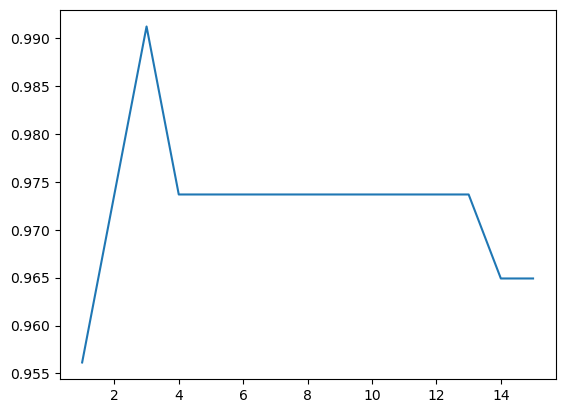

In [12]:

scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.plot(range(1,16),scores) # K=3 gives the best accuracy .. so that is selected. 

## Class 36.8 : Section 31: KNN

### 196 : Udemy - KNN Classifier and KNN Regressor

## K Nearest Neighbour Classifier

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=3, # 3 total features
     n_redundant=1,
    n_classes=2, # binary target/label 
    random_state=999 
)
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## KNN Regressor

In [18]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289


# Class 36.9 : Section 32: Decision Trees


## Class 36.9 : Section 32: Decision Trees
- See handnotes for detailed notes of :
    - Conceptual understanding of how Decision Trees work
    - Splitting Cirteria
    - Decision Tree Classification - Gini Impurity, Entropy, Information Gain, Gini Impurity vs Entropy
    - Decision Tree Regression
    - Pre-prunning and post-pruning
    - Hyperparameters of Decision Tree



### Class 36.9.1 : Session 1 on Decision Tree by CampusX

### Code for Decision Tree classification - and visualization of decision tree

Accuracy: 0.6333333333333333


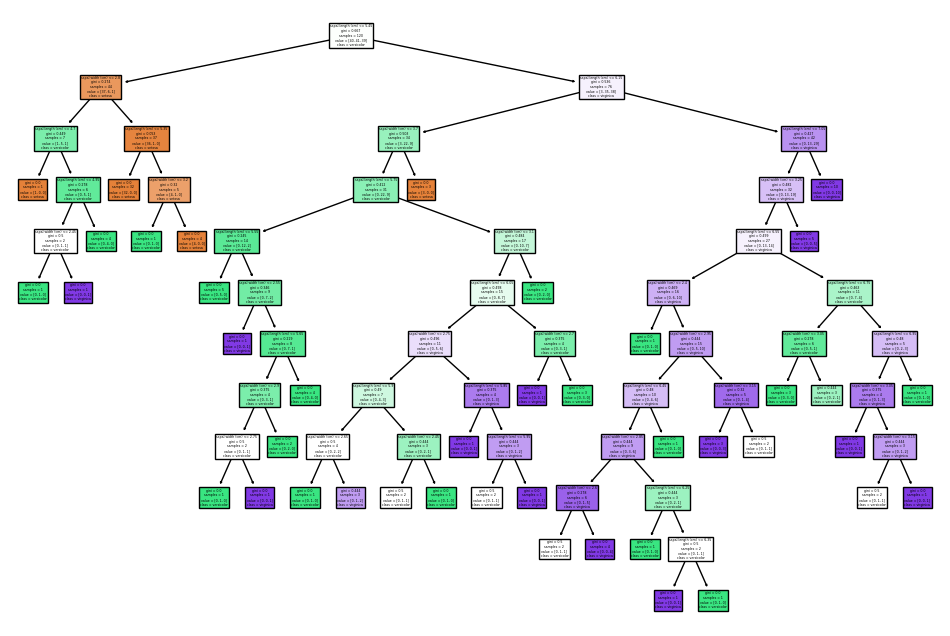

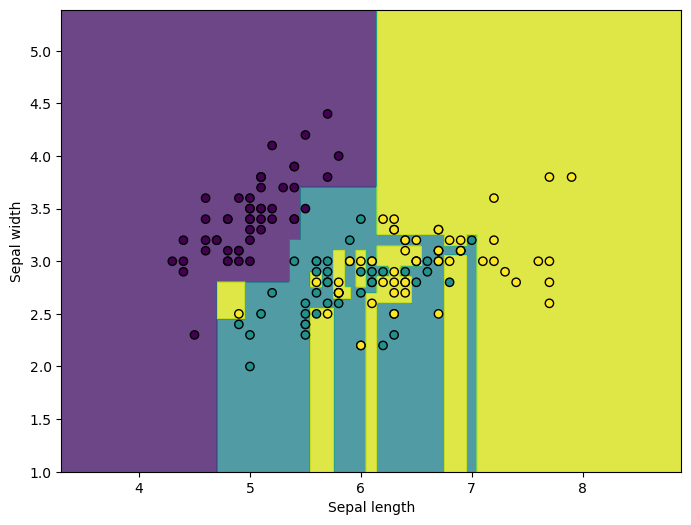

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [10]:
r = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- sepal_length <= 4.95
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal_length >  4.95
|   |   |   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- sepal_length <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.35
|   |   |   |--- sepal_width <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- sepal_width >  3.20
|   |   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- sepal_width <= 3.70
|   |   |   |--- sepal_length <= 5.75
|   |   |   |   |--- sepal_length <= 5.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_length >  5.55
|   |   |   |   |   |--- sepal_width <= 2.55
|   |   |   |   |   |   |--- class: 2
|   |   | 


### Decision Tree  - Printing Feature Importance

In [11]:
clf.feature_importances_

array([0.63062683, 0.36937317])


### Code for Decision Tree classification - and visualization of decision tree

C:\Users\suvam\AppData\Local\Temp\ipykernel_23616\2501677197.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


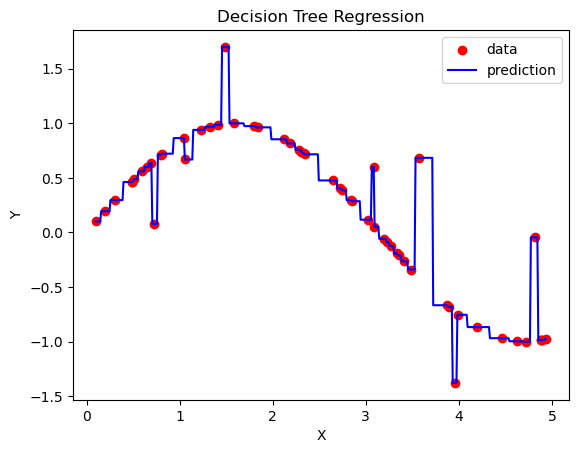

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


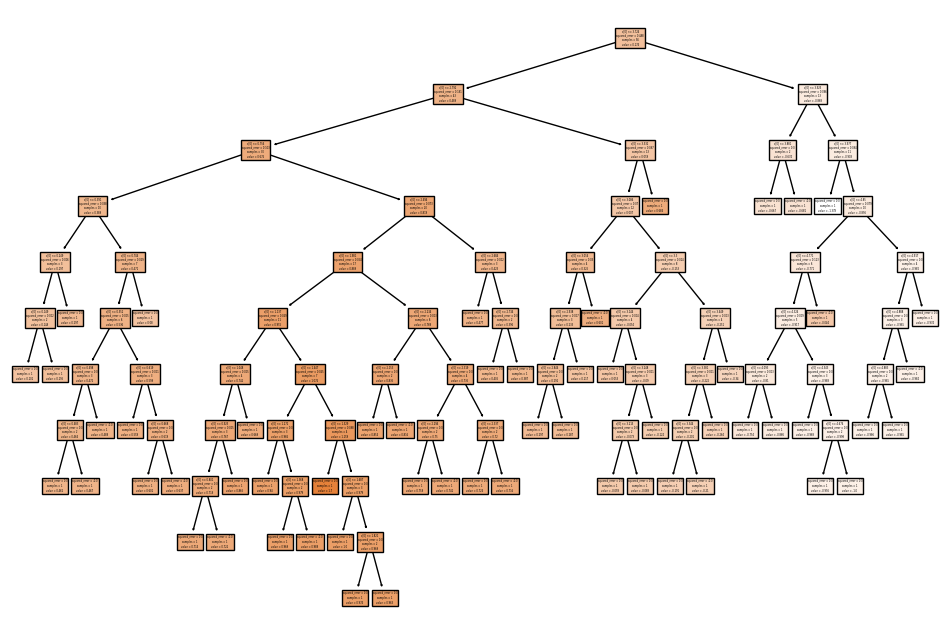

In [7]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()


### Encoded categorical variables are treated as numeric ... so one-hot encoding should be done for categorical variables - else it wont be logical
- Notice that decision tree is taking conditions such as categorical<=1.5 ... such conditions do not make sense as we cannot keep 2 categories (0,1) in 1 bucket and the other 2 in the other and decide the split. i.e. it wont be a One vs Rest logic
- When you encode categorical columns into numerical values for DecisionTreeClassifier, the classifier will treat them as continuous numeric features and apply conditions like > and <, which may lead to incorrect splits if the feature is truly categorical. This happens because decision trees do not inherently distinguish between categorical and continuous variables.

Accuracy on test data: 0.57


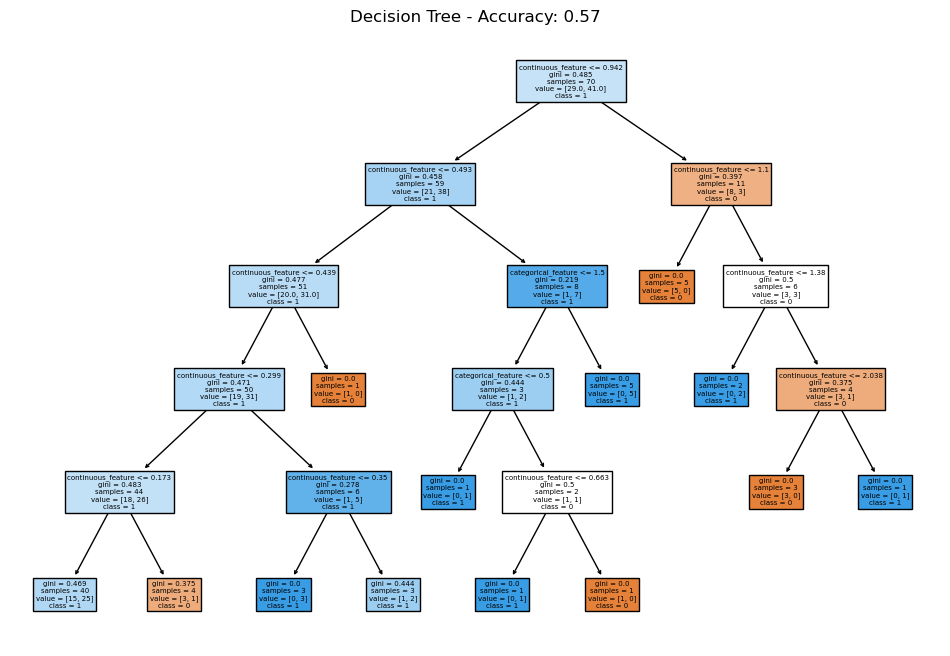

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Generating sample data
np.random.seed(42)
data = pd.DataFrame({
    'categorical_feature': np.random.choice(['A', 'B', 'C','D'], size=100),
    'continuous_feature': np.random.randn(100),
    'target': np.random.choice([0, 1], size=100)
})

# Step 2: Encoding categorical feature into numerical values (0, 1, 2)
data['categorical_feature'] = data['categorical_feature'].map({'A': 0, 'B': 1, 'C': 2,'D':3})

# Step 3: Splitting data into train and test sets
X = data[['categorical_feature', 'continuous_feature']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf.fit(X_train, y_train)

# Evaluating the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['categorical_feature', 'continuous_feature'], class_names=['0', '1'], filled=True)
plt.title(f'Decision Tree - Accuracy: {accuracy:.2f}')
plt.show()



### Now one-hot encoding the categorical variables
- Notice that with one-hot encoding, each category is considered separately—it truly implements a one-vs-rest approach.
- **Dropping the first column after one-hot encoding is not necessary for decision trees.** This practice is typically done to avoid multicollinearity in linear models, but decision trees are non-parametric models and do not have such issues.
- **Suvam's opinion is that the first column should not be dropped.**
    - If it is, the decision tree may need to take more steps. For example, with three categories (A, B, C), if all three are present, the decision tree can check the Gini index for all three and select the best split. However, if one column is dropped (say, A), the decision tree would first need to evaluate B=0, then C=0, before inferring that A=1.
    - Additionally, in decision trees, there is a hyperparameter called max_features, where a subset of features is randomly selected at each split. In such cases, the decision tree might never have the opportunity to consider the dropped category (A)
- **From ChatCPT** : When using max_features or other random feature selection techniques in **decision trees, random forest, Gradient Boosting, AdaBoost, XGBoost** it’s important to retain all one-hot encoded columns. Dropping the first column can lead to that category being underrepresented or ignored in some splits, resulting in suboptimal decision-making by the tree.

Accuracy on test data: 0.50


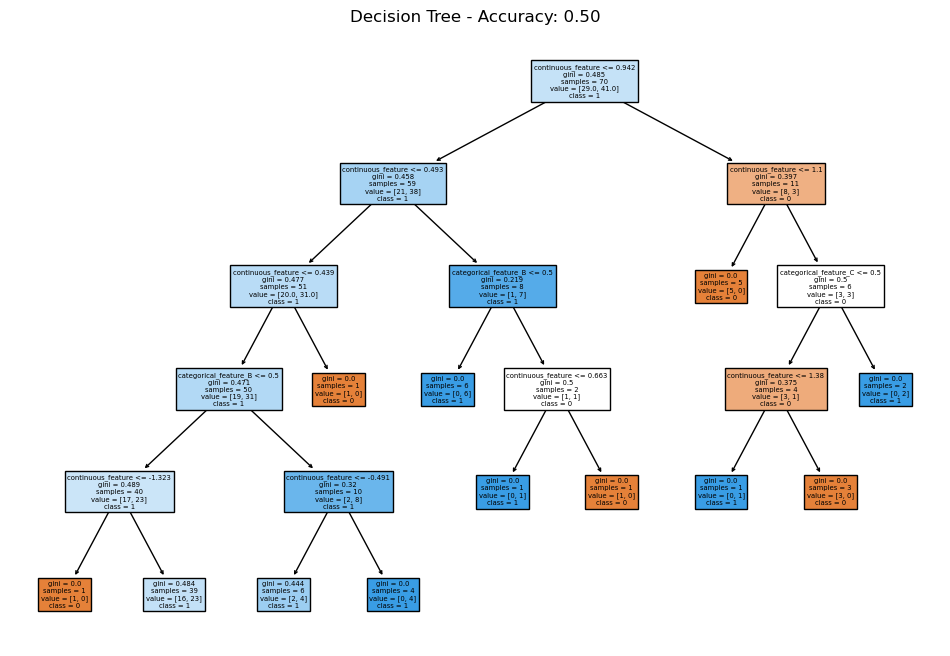

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Generating sample data
np.random.seed(42)
data = pd.DataFrame({
    'categorical_feature': np.random.choice(['A', 'B', 'C','D'], size=100),
    'continuous_feature': np.random.randn(100),
    'target': np.random.choice([0, 1], size=100)
})

# Step 2: One-Hot Encoding the categorical feature
data_encoded = pd.get_dummies(data, columns=['categorical_feature'])

# Step 3: Splitting data into train and test sets
X = data_encoded[['categorical_feature_A','categorical_feature_B', 'categorical_feature_C','categorical_feature_D', 'continuous_feature']]
y = data_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf.fit(X_train, y_train)

# Evaluating the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title(f'Decision Tree - Accuracy: {accuracy:.2f}')
plt.show()



### Class 36.9.8 : Handwriting Classifier using Decision Tree by CampusX


In [2]:
pwd

'C:\\Users\\suvam\\Desktop\\IT Return related docs\\Suvam Learning and Training notes\\003_Machine Learning Algos_Aug24'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This file has pixel by pixel data for 42000 images .. each image is of 28 x 28 pixel .. i.e. 784 pixel
df = pd.read_csv("DataFiles\\Class_36_9_8_Handwriting_classifier_using_DecisionTree.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [19]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_test[100]

5

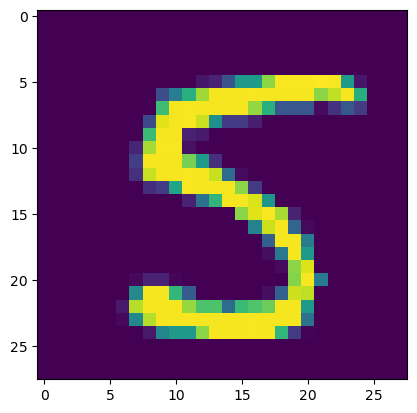

In [27]:
plt.imshow(np.array(X_test.iloc[100]).reshape(28,28))

In [28]:
classifier.predict(np.array(X_test.iloc[100]).reshape(1,784))

C:\Users\suvam\anaconda3_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)


# Class 36.9.10 : Self discovered material for Post Pruning
- Hand Notes in Random Forest .. code in Decision Tree Jupyter


# Post pruning decision trees with cost complexity pruning

In [56]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Loading Data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Automatically created module for IPython interactive environment


0.8811188811188811


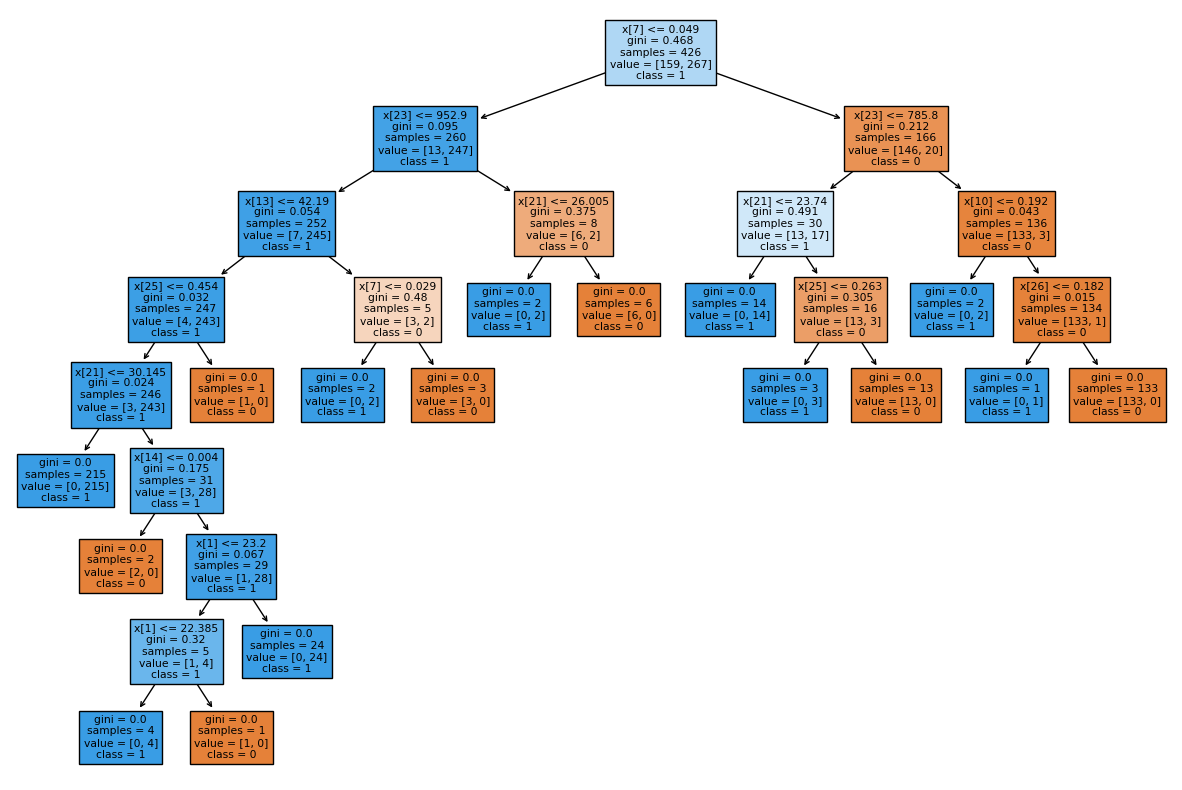

In [57]:
## Fitting a Fully Grown Decision Tree to see

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

## Plotting the fully grown decision tree to visualize
plt.figure(figsize=(15,10))
plot_tree(clf, class_names=['0', '1'], filled=True)
plt.show()


### Printing alpha_effective for the tree

In [58]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

### Fitting a separate Decision Tree for each value of alpha_effective .. and plotting accuracy to final optimal alpha_effective

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

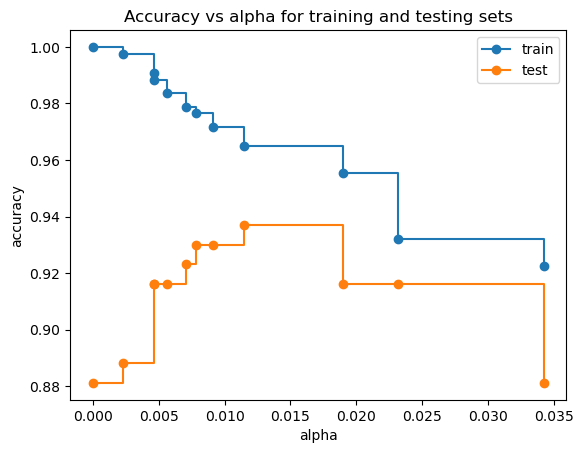

In [60]:
train_scores = [clf.score(X_train, y_train) for clf in clfs[0:-1]]
test_scores = [clf.score(X_test, y_test) for clf in clfs[0:-1]]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[0:-1], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[0:-1], test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# By reviewing the graph - we can see that alpha between 0.01144366 and 0.018988 is ideal ..
# above 0.018988 leads to decrease is accuracy for train and test

### Plotting the final decision tree with the selected alpha

0.9370629370629371


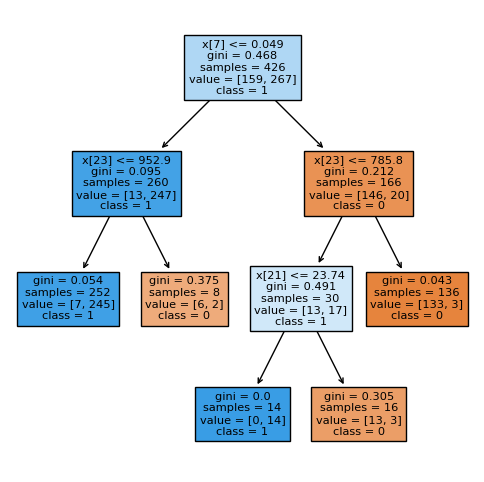

In [62]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

plt.figure(figsize=(6,6))
plot_tree(clf, class_names=['0', '1'], filled=True)
plt.show()